<a href="https://colab.research.google.com/github/Ambercam/Ambercam/blob/main/SJ_imagemanipulation_PRIMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A few quick demos of image manipulation in Python using the Pillow library

[Miles Berry](mailto:m.berry@roehampton.ac.uk), October 2021

Importing libraries to work with images, to open online files and to display images. Check out [Pillow's documentation](https://pillow.readthedocs.io/en/stable/index.html). 

In [ ]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

Downloading a picture from the web. This one is under a CC0 licence, but you can use any image URL here. 

In [ ]:
url = "https://cdn.pixabay.com/photo/2016/02/10/16/37/cat-1192026_960_720.jpg"
r=requests.get(url)
open('image.jpg','wb').write(r.content)


110607

## Working with Pillow

Opening the image in memory

In [ ]:
image=Image.open('image.jpg')
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x720 at 0x7F1D74F36C90>


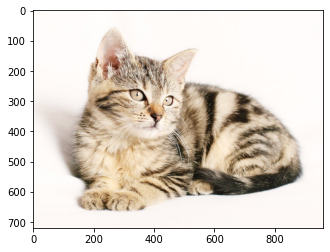

In [ ]:
plt.imshow(image)

The Pillow image library has a number of useful tools...

In [ ]:
def showtwo(left, right):
  plt.subplot(1, 2, 1)
  plt.imshow(left)
  plt.subplot(1, 2, 2)
  plt.imshow(right)
  plt.show()

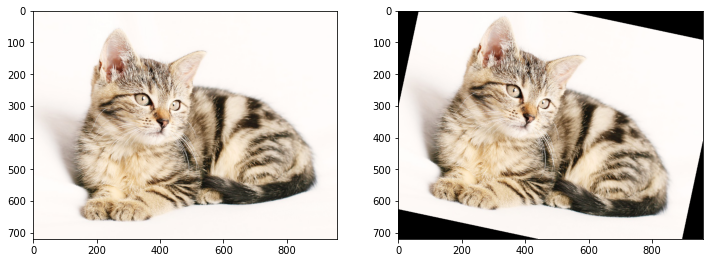

In [ ]:
rotated_image = image.rotate(-12)
showtwo(image, rotated_image)

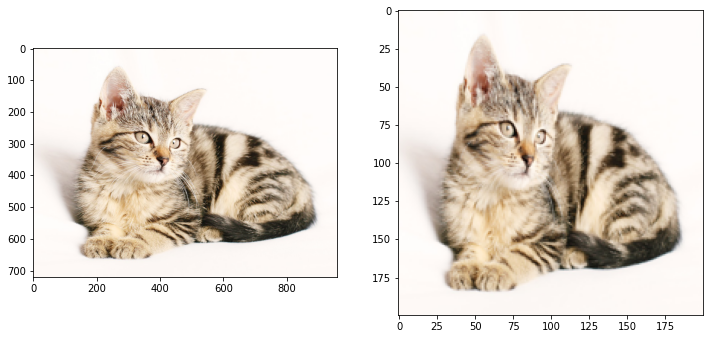

In [ ]:
resized_image = image.resize((200, 200))
showtwo(image, resized_image)

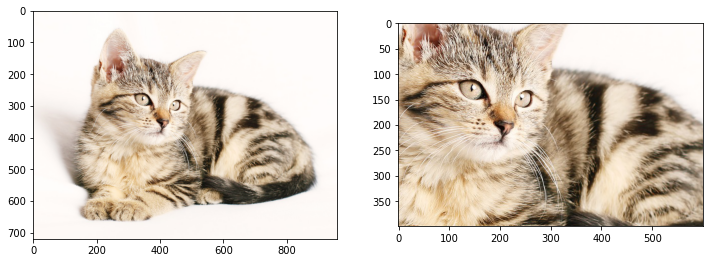

In [ ]:
cropped_image = image.crop(box = (200, 150, 800, 550))
showtwo(image, cropped_image)

Including the ability to extract the r,g,b values of individual pixels

In [ ]:
image.getpixel((300, 300))

(227, 201, 168)

Resampling the image to 240 pixels wide, to speed things up...

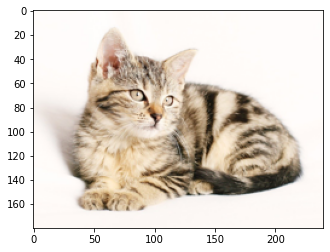

In [ ]:
image = image.resize((240, int(image.height * 240 / image.width)))
plt.imshow(image)

Checking the width and height of the resampled image

In [ ]:
width = image.width
height = image.height
width, height

(240, 180)

## Modifying pixels

Creating a new, black image the same size as the above

In [ ]:
image2 = Image.new("RGB", (width, height))

Brighter

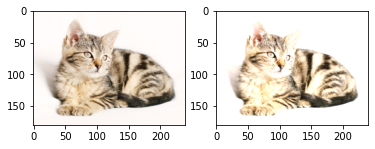

In [ ]:
brightness = 1.2
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    newpixel = (int(min(oldpixel[0] * brightness, 255)),
              int(min(oldpixel[1] * brightness, 255)),
              int(min(oldpixel[2] * brightness, 255))) 
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

Warmer

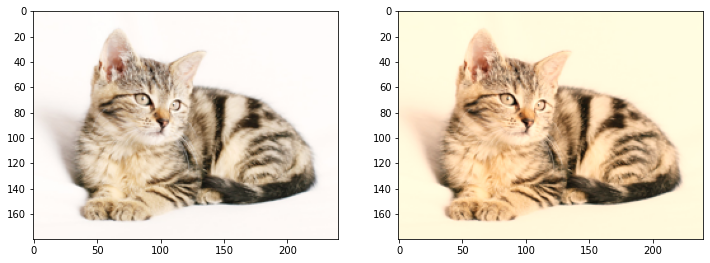

In [ ]:
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    newpixel = (  ,  ,  )
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

Negative

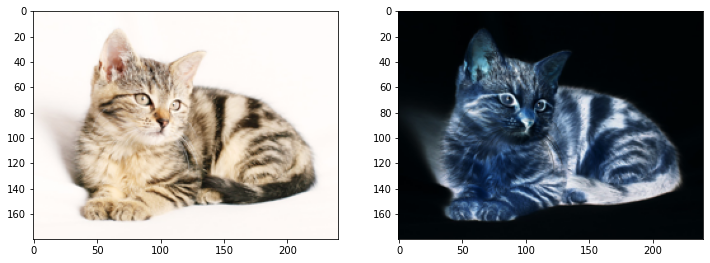

In [ ]:
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    newpixel = (  ,  ,  ) 
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

Swapping some channels around...

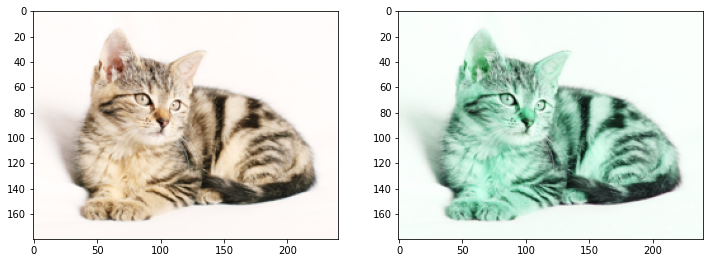

In [ ]:
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    newpixel = (  ,  ,  ,) 
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

Mirror image - replacing pixels from those on the other side of the rows

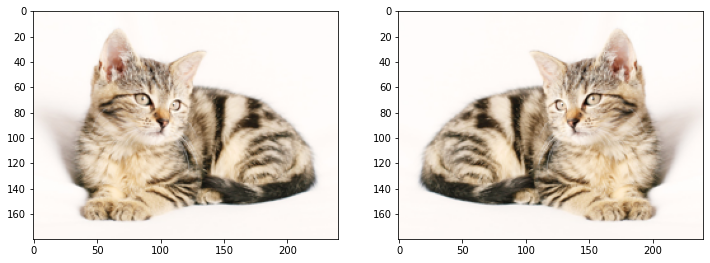

In [ ]:
for x in range(width):
  for y in range(height):
    newpixel = image.getpixel(...)
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

Grey scale - setting the three values to the average of red, green and blue in the original

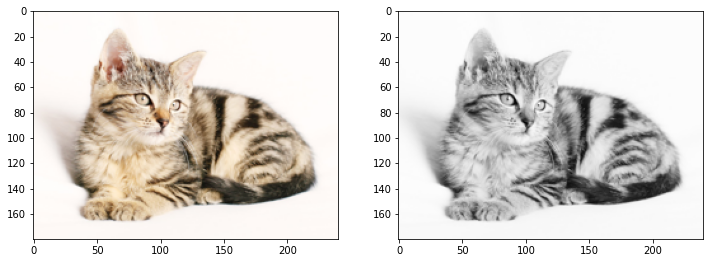

In [ ]:
for x in range(width):
  for y in range(height):
    ...
showtwo(image, image2)

Black and white only (try changing the threshold value of 192 here)

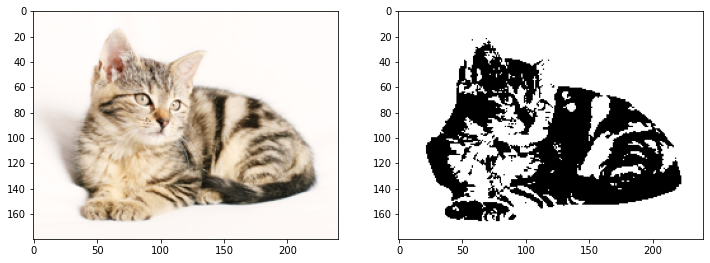

In [ ]:
threshold = 192
for x in range(width):
  for y in range(height):
    ...
    image2.putpixel((x, y), (value, value, value))
showtwo(image, image2)

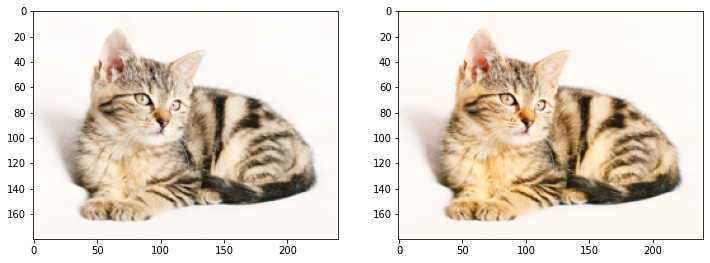

In [ ]:
saturation = 1.5
newpixel = [0, 0, 0]
for x in range(width):
  for y in range(height):
    ...
    image2.putpixel((x, y), tuple(newpixel))
showtwo(image, image2)

Blurring - each pixel is the average of the nine around it. 

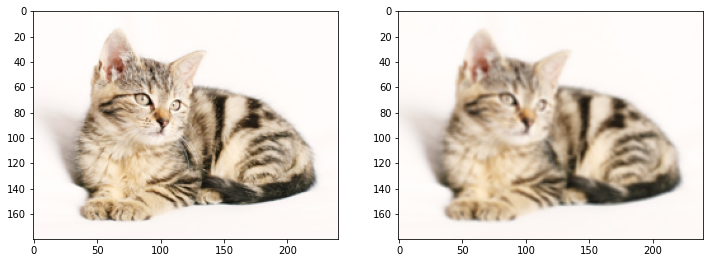

In [ ]:
for x in range(1, width - 1):
  for y in range(1, height - 1):
    ...
showtwo(image, image2)

## Convolutions

In [ ]:
def convolve(kernel,image):
  weight = sum([sum(row) for row in kernel])
  if weight != 0:
    kernel=[[cell/weight for cell in row] for row in kernel]

  image2 = Image.new("RGB", (image.width, image.height))
  
  for x in range(1, width - 1):
    for y in range(1, height - 1):
      newpixel=[0, 0, 0]
      for dx in range(-1, 2):
        for dy in range(-1, 2):
          nearby=image.getpixel((x + dx, y + dy))
          for j in range(3):
            newpixel[j]=newpixel[j] + nearby[j] * kernel[1 + dy][1 + dx]
      newpixel=tuple(map(int, newpixel))
      image2.putpixel((x, y), newpixel)
  
  return(image2)

Approximately Gaussian blur, using a convolution.

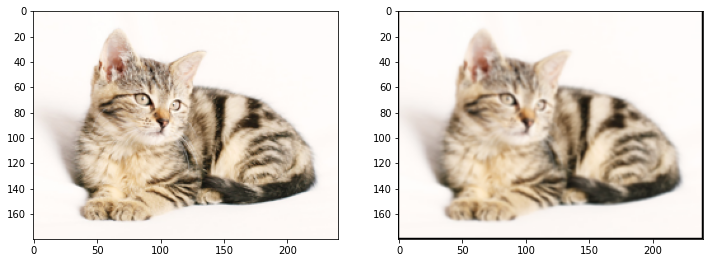

In [ ]:
showtwo(image, convolve([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]], image))

Sharpening

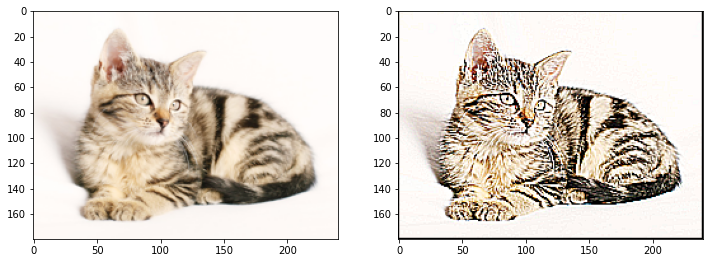

In [ ]:
showtwo(image, convolve([...], image))

Edge detection

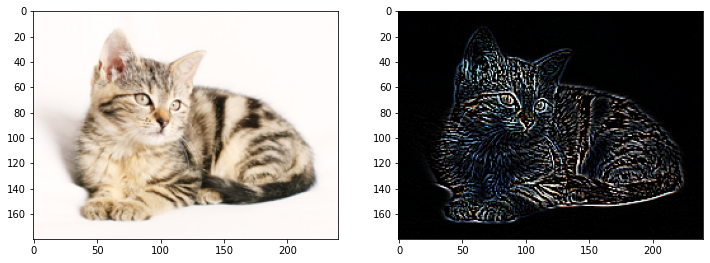

In [ ]:
showtwo(image, convolve([...], image))

Unsharp mask

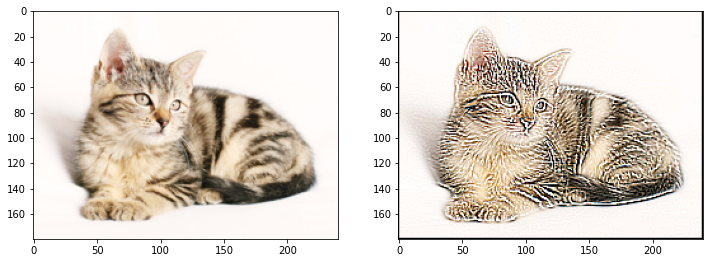

In [ ]:
showtwo(image, convolve([...], image))